## 1. Tehtävän tarkoitus

Tehtävässä on tarkoitus tutustua jupyter notebookin käyttöön ja opetella käyttämään ja muokkaamaan pandas dataframeja.

Tähän tarkoitukseen manipuloidaan datasettiä jossa on tietoja kroonisia munuaistauteja sairastavista henkilöistä.

## 2. Datan tarkastelu

Linkki datasettiin: https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease

Ladataan datasetti uci:n paketin avulla ja tuodaan datan käsittelyyn tarvittavat työkalut.

Datasetissä on muuttujina potilaille erilaisia lääketieteellisiä metriikkoja kuten veren ureapitoisuutta, hemoglobiiniarvoja ja verenpainetta. Osa muuttujista on numeerisia, osa kategorillisia ja osa binaarisiä(esim. onko jotain oiretta). Datasetissä on kohdemuuttujana luokka joka saa arvoja 'ckd' tai 'notckd', missä 'ckd' tarkoittaa kroonista munuaissairautta ja 'notckd' taas tervettä, jota kutsumme tästä lähtien dokumentissa kontrolliryhmäksi.

Alla nähdään tulostettuna datasetin sisältä pandas-dataframeina.

In [3]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 
import numpy as np
import matplotlib.pyplot as plt
  
chronic_kidney_disease = fetch_ucirepo(id=336) 
  
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets 

df_X = pd.DataFrame(X)
df_X.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
dtype: object

In [4]:
df_X

age    bp     sg   al   su     rbc        pc         pcc          ba  \
0    48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1     7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2    62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3    48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4    51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   
..    ...   ...    ...  ...  ...     ...       ...         ...         ...   
395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   

       bgr  ...  hemo   pcv    wbcc  rbcc  htn   dm  cad  appet   pe  ane  
0    121.0  ...  15.4  44.0  7800.0   5.2  yes  yes   no   good   no   no  
1      NaN  ...  11.3  38.0  6000.0   NaN   no   no   no   good   no   no  
2    423.0  ...   9.6  31.0  7500.0   NaN   no  yes   no   poor   no  yes  
3    117.0  ...  11.2  32.0  6700.0   3.9  yes   no   no   poor  yes  yes  
4    106.0  ...  11.6  35.0  7300.0   4.6   no   no   no   good   no   no  
..     ...  ...   ...   ...     ...   ...  ...  ...  ...    ...  ...  ...  
395  140.0  ...  15.7  47.0  6700.0   4.9   no   no   no   good   no   no  
396   75.0  ...  16.5  54.0  7800.0   6.2   no   no   no   good   no   no  
397  100.0  ...  15.8  49.0  6600.0   5.4   no   no   no   good   no   no  
398  114.0  ...  14.2  51.0  7200.0   5.9   no   no   no   good   no   no  
399  131.0  ...  15.8  53.0  6800.0   6.1   no   no   no   good   no   no  

[400 rows x 24 columns]

In [5]:
df_y = pd.DataFrame(y)
df_y

class
0       ckd
1       ckd
2       ckd
3       ckd
4       ckd
..      ...
395  notckd
396  notckd
397  notckd
398  notckd
399  notckd

[400 rows x 1 columns]

In [6]:
df_y.dtypes

class    object
dtype: object

## 3. Datan muokkaus

Yhdistetään datasetin 'feature' ja 'target' muuttujat yhdeksi tauluksi:

In [8]:
df_tot = pd.concat([df_X, df_y], axis=1)
df_tot

age    bp     sg   al   su     rbc        pc         pcc          ba  \
0    48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1     7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2    62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3    48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4    51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   
..    ...   ...    ...  ...  ...     ...       ...         ...         ...   
395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   

       bgr  ...   pcv    wbcc  rbcc  htn   dm  cad  appet   pe  ane   class  
0    121.0  ...  44.0  7800.0   5.2  yes  yes   no   good   no   no     ckd  
1      NaN  ...  38.0  6000.0   NaN   no   no   no   good   no   no     ckd  
2    423.0  ...  31.0  7500.0   NaN   no  yes   no   poor   no  yes     ckd  
3    117.0  ...  32.0  6700.0   3.9  yes   no   no   poor  yes  yes     ckd  
4    106.0  ...  35.0  7300.0   4.6   no   no   no   good   no   no     ckd  
..     ...  ...   ...     ...   ...  ...  ...  ...    ...  ...  ...     ...  
395  140.0  ...  47.0  6700.0   4.9   no   no   no   good   no   no  notckd  
396   75.0  ...  54.0  7800.0   6.2   no   no   no   good   no   no  notckd  
397  100.0  ...  49.0  6600.0   5.4   no   no   no   good   no   no  notckd  
398  114.0  ...  51.0  7200.0   5.9   no   no   no   good   no   no  notckd  
399  131.0  ...  53.0  6800.0   6.1   no   no   no   good   no   no  notckd  

[400 rows x 25 columns]

Poistetaan muuttujat joita ei haluttu tehtävänannossa:

In [10]:
df_f = df_tot.drop(columns=['rbc','pc','pcc','ba','sc','htn','dm','cad','appet','pe','ane'])
df_f

age    bp     sg   al   su    bgr    bu    sod  pot  hemo   pcv    wbcc  \
0    48.0  80.0  1.020  1.0  0.0  121.0  36.0    NaN  NaN  15.4  44.0  7800.0   
1     7.0  50.0  1.020  4.0  0.0    NaN  18.0    NaN  NaN  11.3  38.0  6000.0   
2    62.0  80.0  1.010  2.0  3.0  423.0  53.0    NaN  NaN   9.6  31.0  7500.0   
3    48.0  70.0  1.005  4.0  0.0  117.0  56.0  111.0  2.5  11.2  32.0  6700.0   
4    51.0  80.0  1.010  2.0  0.0  106.0  26.0    NaN  NaN  11.6  35.0  7300.0   
..    ...   ...    ...  ...  ...    ...   ...    ...  ...   ...   ...     ...   
395  55.0  80.0  1.020  0.0  0.0  140.0  49.0  150.0  4.9  15.7  47.0  6700.0   
396  42.0  70.0  1.025  0.0  0.0   75.0  31.0  141.0  3.5  16.5  54.0  7800.0   
397  12.0  80.0  1.020  0.0  0.0  100.0  26.0  137.0  4.4  15.8  49.0  6600.0   
398  17.0  60.0  1.025  0.0  0.0  114.0  50.0  135.0  4.9  14.2  51.0  7200.0   
399  58.0  80.0  1.025  0.0  0.0  131.0  18.0  141.0  3.5  15.8  53.0  6800.0   

     rbcc   class  
0     5.2     ckd  
1     NaN     ckd  
2     NaN     ckd  
3     3.9     ckd  
4     4.6     ckd  
..    ...     ...  
395   4.9  notckd  
396   6.2  notckd  
397   5.4  notckd  
398   5.9  notckd  
399   6.1  notckd  

[400 rows x 14 columns]

Nimetään uudelleen halutut muuttujat tehtävänannon vaatimalla tavalla. Tämä myös lisää huomattavasti datan ihmisluettavuutta. Lisäksi poistetaan rivit joilta puuttuu 3 tai enemmän arvoa ja muutetaan hemoglobiinin yksikkö grammoihin litrassa.

In [12]:
df_f = df_f.rename(columns={'bp': 'blood pressure',
                             'sg': 'specific gravity',
                             'al': 'albumin',
                             'su': 'sugar',
                             'bgr': 'blood glucose random',
                             'bu': 'blood urea',
                             'sod': 'sodium',
                             'pot': 'potassium',
                             'hemo': 'hemoglobin',
                             'pcv': 'packed cell volume',
                             'wbcc': 'white blood cell count',
                             'rbcc': 'red blood cell count'})
df_f = df_f.dropna(thresh=len(df_f.columns) - 2)
df_f['hemoglobin'] = df_f['hemoglobin'].apply(lambda x: x*10)

Viimeiseksi muutetaan tautistatus kategoriaksi ja annetaan arvoiksi c ja a(c=kontrolliryhmä, a=sairas ryhmä).

In [14]:
df_f['class'] = df_f['class'].apply(lambda x: 'c' if x == 'notckd' else 'a')
df_f['class'] = df_f['class'].astype('category')
df_f

age  blood pressure  specific gravity  albumin  sugar  \
0    48.0            80.0             1.020      1.0    0.0   
3    48.0            70.0             1.005      4.0    0.0   
4    51.0            80.0             1.010      2.0    0.0   
5    60.0            90.0             1.015      3.0    0.0   
6    68.0            70.0             1.010      0.0    0.0   
..    ...             ...               ...      ...    ...   
395  55.0            80.0             1.020      0.0    0.0   
396  42.0            70.0             1.025      0.0    0.0   
397  12.0            80.0             1.020      0.0    0.0   
398  17.0            60.0             1.025      0.0    0.0   
399  58.0            80.0             1.025      0.0    0.0   

     blood glucose random  blood urea  sodium  potassium  hemoglobin  \
0                   121.0        36.0     NaN        NaN       154.0   
3                   117.0        56.0   111.0        2.5       112.0   
4                   106.0        26.0     NaN        NaN       116.0   
5                    74.0        25.0   142.0        3.2       122.0   
6                   100.0        54.0   104.0        4.0       124.0   
..                    ...         ...     ...        ...         ...   
395                 140.0        49.0   150.0        4.9       157.0   
396                  75.0        31.0   141.0        3.5       165.0   
397                 100.0        26.0   137.0        4.4       158.0   
398                 114.0        50.0   135.0        4.9       142.0   
399                 131.0        18.0   141.0        3.5       158.0   

     packed cell volume  white blood cell count  red blood cell count class  
0                  44.0                  7800.0                   5.2     a  
3                  32.0                  6700.0                   3.9     a  
4                  35.0                  7300.0                   4.6     a  
5                  39.0                  7800.0                   4.4     a  
6                  36.0                     NaN                   NaN     a  
..                  ...                     ...                   ...   ...  
395                47.0                  6700.0                   4.9     c  
396                54.0                  7800.0                   6.2     c  
397                49.0                  6600.0                   5.4     c  
398                51.0                  7200.0                   5.9     c  
399                53.0                  6800.0                   6.1     c  

[265 rows x 14 columns]

Jaetaan sairausstatuksen mukaan dataframe sairaisiin ja kontrolliryhmään.

In [16]:
df_a = df_f[df_f['class'] == 'a']
df_c = df_f[df_f['class'] == 'c']

## Visualisointi

Seuraavaksi piirretään molemmista dataframeista histogrammit ja korrelaatiomatriisit visuaalista tarkastelua varten:

In [18]:
def plot_data(df):
    plt.figure(figsize=(20, 50))
    numerical_columns = df.select_dtypes(include=['int', 'float'])   
    for i, col in enumerate(numerical_columns):
        plt.subplot(7, 2, i + 1)      
        if col in ['specific gravity']:  
            bins = np.arange(df[col].min() - 0.001, df[col].max() + 0.001, 0.0005)
        elif col in ['blood glucose random', 'blood urea']:  
            bins = np.arange(df[col].min() - 5, df[col].max() + 5, 3)
        elif col in ['red blood cell count']:  
            bins = np.arange(df[col].min() - 0.05, df[col].max() + 0.05, 0.1)
        elif col in ['potassium']:  
            bins = np.arange(df[col].min() - 0.1, df[col].max() + 0.1, 0.1)
        elif col in ['white blood cell count']:  
            bins = np.arange(df[col].min() - 100, df[col].max() + 100, 200)
        else:  
            bins = np.arange(df[col].min() - 0.5, df[col].max() + 1.5, 1)
                        
        df[col].plot(kind='hist', title=col, edgecolor='black', bins=bins)
        plt.xlabel(col)
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.2, wspace=0.1)
    plt.show()
  

### Histogrammit, tiedot ja korrelaatiomatriisi sairaalle ryhmälle:

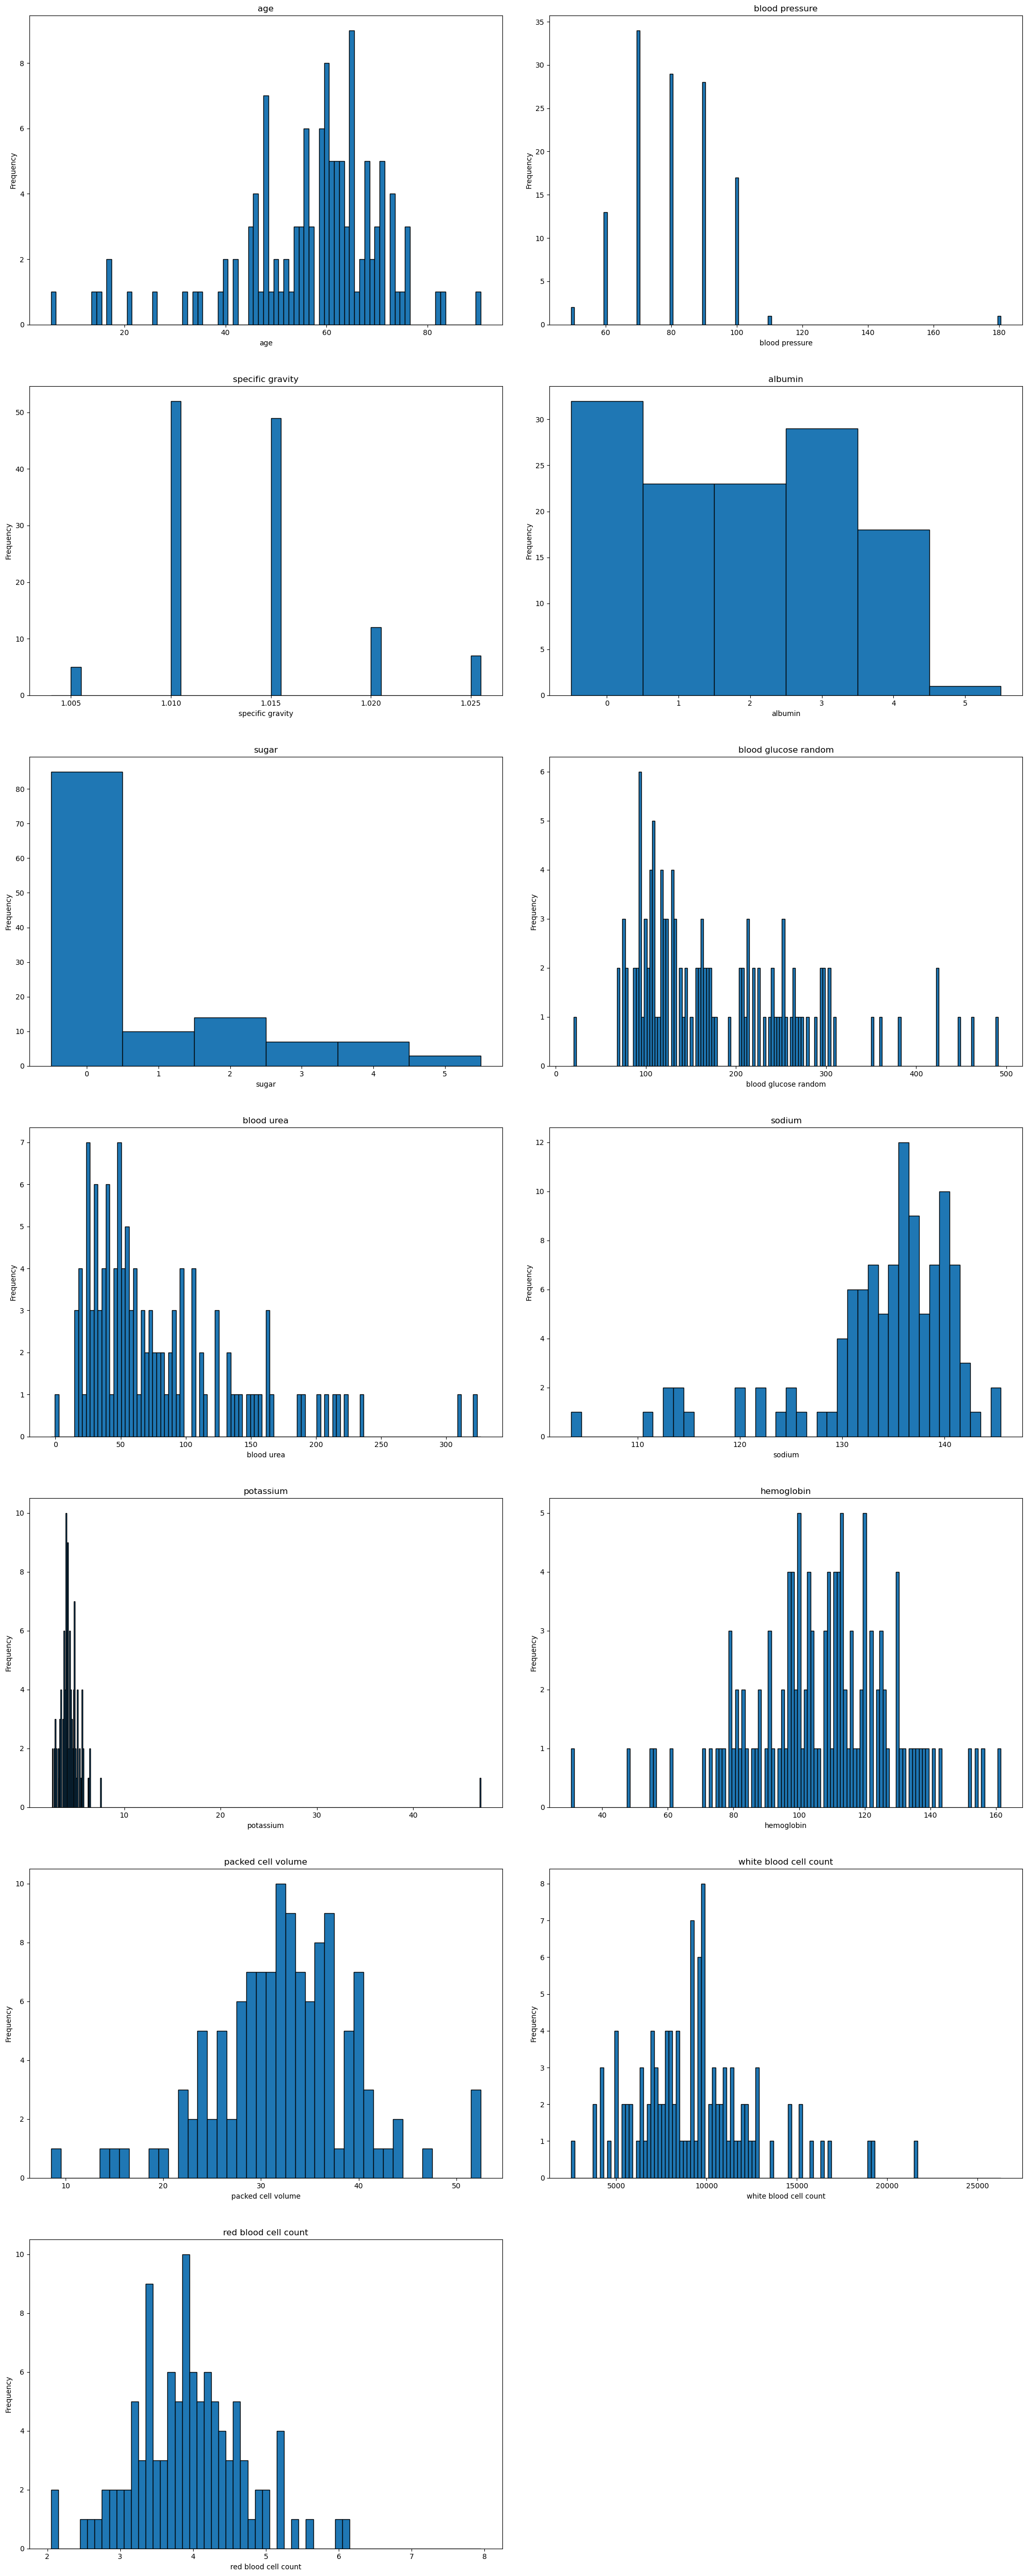

In [20]:
plot_data(df_a)


In [21]:
df_a.describe(include='all')

age  blood pressure  specific gravity     albumin       sugar  \
count   123.000000      125.000000        125.000000  126.000000  126.000000   
unique         NaN             NaN               NaN         NaN         NaN   
top            NaN             NaN               NaN         NaN         NaN   
freq           NaN             NaN               NaN         NaN         NaN   
mean     57.081301       80.720000          1.013560    1.849206    0.809524   
std      14.465104       15.769305          0.004527    1.437038    1.366539   
min       6.000000       50.000000          1.005000    0.000000    0.000000   
25%      49.500000       70.000000          1.010000    0.250000    0.000000   
50%      60.000000       80.000000          1.015000    2.000000    0.000000   
75%      65.000000       90.000000          1.015000    3.000000    1.000000   
max      90.000000      180.000000          1.025000    5.000000    5.000000   

        blood glucose random  blood urea      sodium   potassium  hemoglobin  \
count             120.000000  125.000000  108.000000  108.000000  125.000000   
unique                   NaN         NaN         NaN         NaN         NaN   
top                      NaN         NaN         NaN         NaN         NaN   
freq                     NaN         NaN         NaN         NaN         NaN   
mean              181.200000   80.420000  133.731481    4.751852  106.432000   
std                93.549394   60.501346    7.666661    4.203592   21.896507   
min                22.000000    1.500000  104.000000    2.500000   31.000000   
25%               107.000000   37.000000  131.750000    3.800000   95.000000   
50%               158.000000   60.000000  136.000000    4.200000  108.000000   
75%               241.250000  107.000000  139.000000    4.900000  120.000000   
max               490.000000  322.000000  145.000000   47.000000  161.000000   

        packed cell volume  white blood cell count  red blood cell count class  
count           125.000000              113.000000            108.000000   126  
unique                 NaN                     NaN                   NaN     1  
top                    NaN                     NaN                   NaN     a  
freq                   NaN                     NaN                   NaN   126  
mean             32.440000             9450.442478              3.976852   NaN  
std               7.150908             3720.458015              0.844510   NaN  
min               9.000000             2600.000000              2.100000   NaN  
25%              29.000000             7100.000000              3.400000   NaN  
50%              33.000000             9200.000000              3.900000   NaN  
75%              37.000000            11000.000000              4.400000   NaN  
max              52.000000            26400.000000              8.000000   NaN

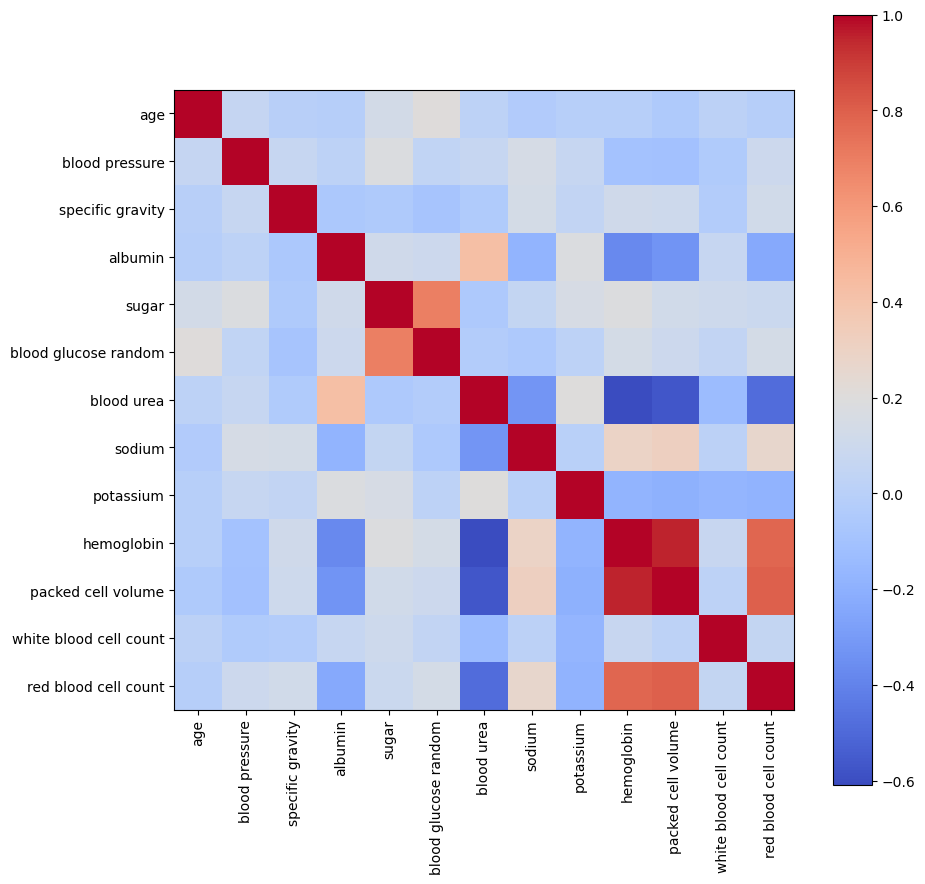

In [22]:
corr_a = df_a.drop(columns=['class']).corr()
plt.figure(figsize=(10, 10))
plt.imshow(corr_a, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_a)), corr_a.columns, rotation=90)
plt.yticks(range(len(corr_a)), corr_a.columns)
plt.show()

### Histogrammit, tiedot ja korrelaatiomatriisi kontrolliryhmälle:

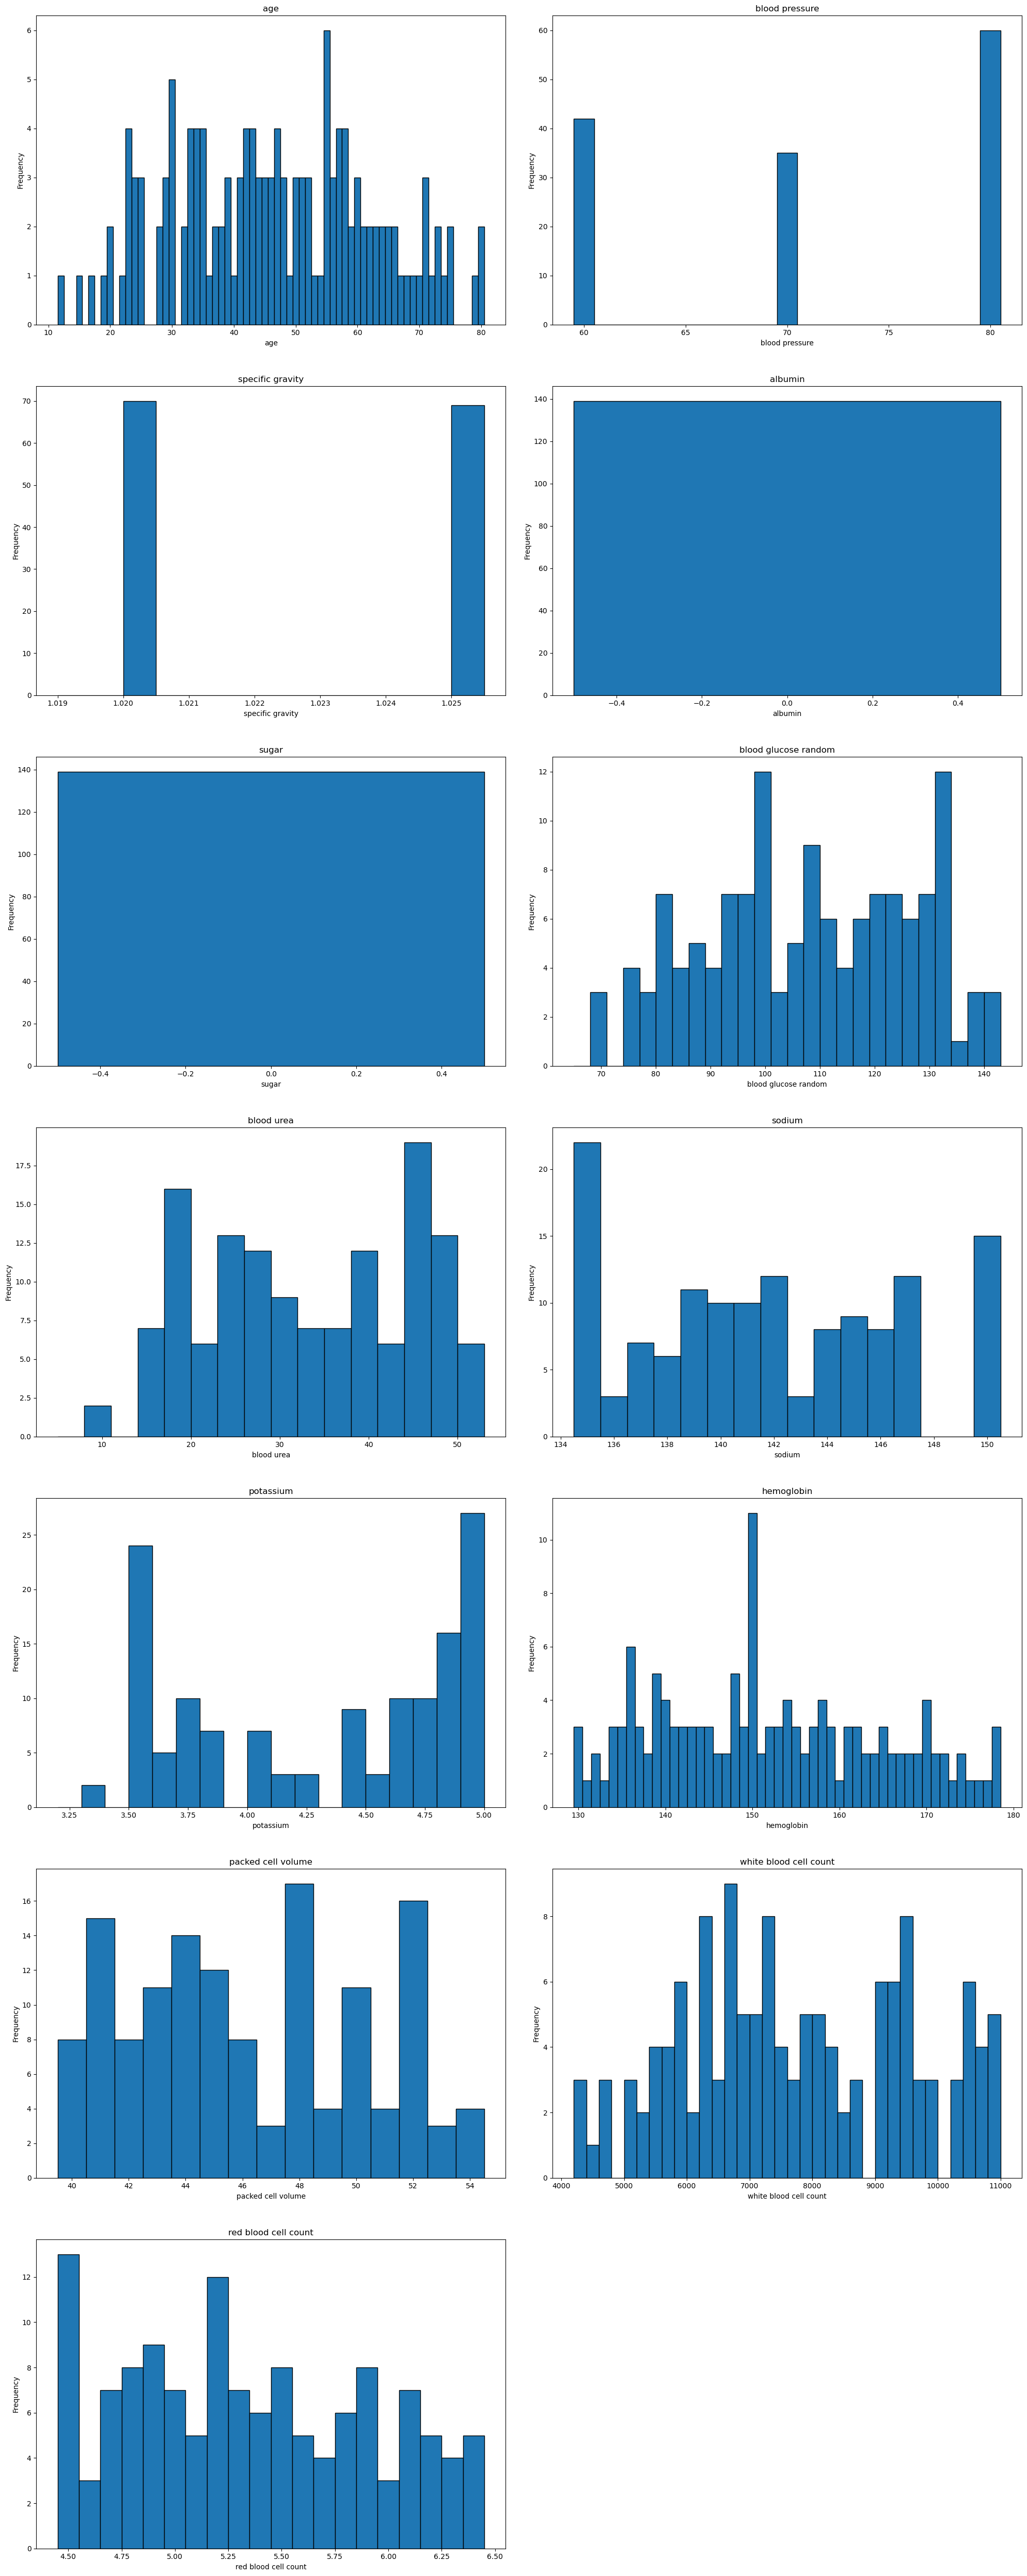

In [24]:
plot_data(df_c)  

In [25]:
df_c.describe(include='all')

age  blood pressure  specific gravity  albumin  sugar  \
count   139.000000      137.000000        139.000000    139.0  139.0   
unique         NaN             NaN               NaN      NaN    NaN   
top            NaN             NaN               NaN      NaN    NaN   
freq           NaN             NaN               NaN      NaN    NaN   
mean     46.568345       71.313869          1.022482      0.0    0.0   
std      15.903719        8.559267          0.002509      0.0    0.0   
min      12.000000       60.000000          1.020000      0.0    0.0   
25%      34.000000       60.000000          1.020000      0.0    0.0   
50%      46.000000       70.000000          1.020000      0.0    0.0   
75%      58.000000       80.000000          1.025000      0.0    0.0   
max      80.000000       80.000000          1.025000      0.0    0.0   

        blood glucose random  blood urea      sodium   potassium  hemoglobin  \
count             135.000000  135.000000  136.000000  136.000000  137.000000   
unique                   NaN         NaN         NaN         NaN         NaN   
top                      NaN         NaN         NaN         NaN         NaN   
freq                     NaN         NaN         NaN         NaN         NaN   
mean              107.385185   32.874074  141.735294    4.335294  151.883212   
std                18.747730   11.482257    4.792332    0.596351   12.845270   
min                70.000000   10.000000  135.000000    3.300000  130.000000   
25%                93.000000   23.500000  138.000000    3.700000  141.000000   
50%               107.000000   33.000000  141.000000    4.500000  150.000000   
75%               123.500000   44.000000  146.000000    4.900000  162.000000   
max               140.000000   50.000000  150.000000    5.000000  178.000000   

        packed cell volume  white blood cell count  red blood cell count class  
count           138.000000              136.000000            136.000000   139  
unique                 NaN                     NaN                   NaN     1  
top                    NaN                     NaN                   NaN     c  
freq                   NaN                     NaN                   NaN   139  
mean             46.246377             7708.088235              5.380882   NaN  
std               4.107695             1815.164727              0.592986   NaN  
min              40.000000             4300.000000              4.500000   NaN  
25%              43.000000             6300.000000              4.900000   NaN  
50%              46.000000             7450.000000              5.300000   NaN  
75%              50.000000             9225.000000              5.900000   NaN  
max              54.000000            11000.000000              6.500000   NaN

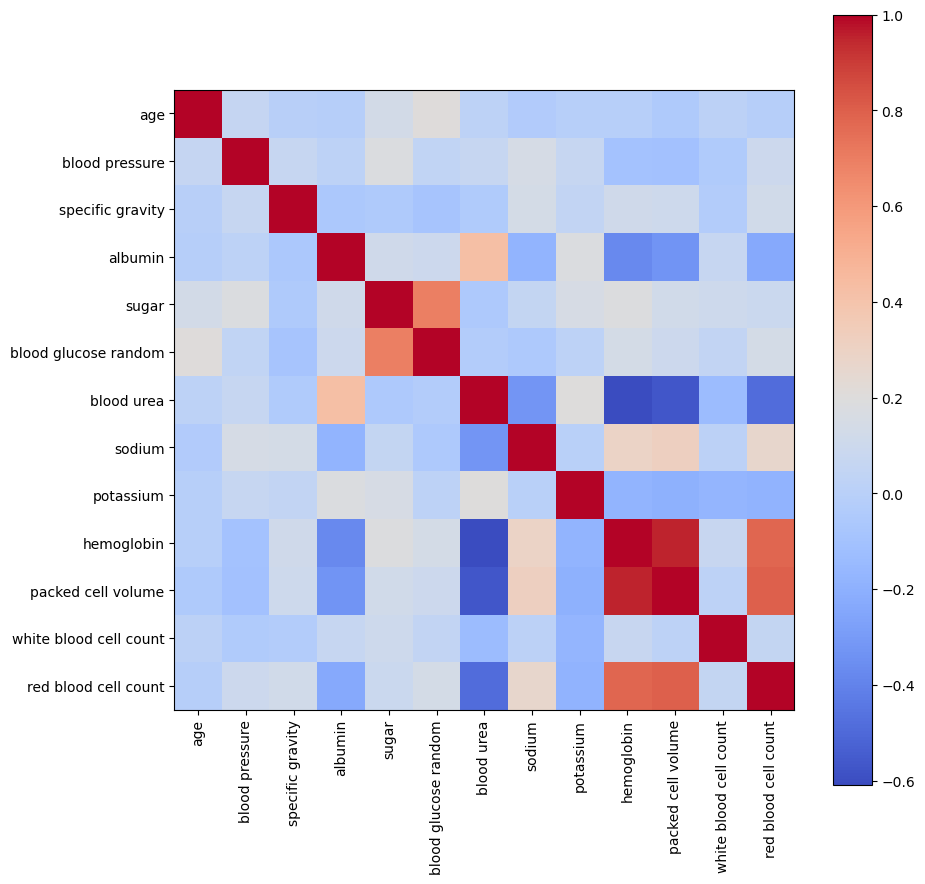

In [26]:
corr_c = df_a.drop(columns=['class']).corr()
plt.figure(figsize=(10, 10))
plt.imshow(corr_a, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_c)), corr_c.columns, rotation=90)
plt.yticks(range(len(corr_c)), corr_c.columns)
plt.show()

## Analyysi

Tehtävänannossa pyydettiin etsimään ja kommentoimaan poikkeavia arvoja ja mitä niille pitäisi tehdä. 

Kontrolliryhmästä on vaikeampi löytää poikkeuksellisia tai virheellisiä arvoja datapisteiden vähyyden takia mutta sairaasta ryhmästä niitä löytyy selvemmin. Parina esimerkkinä potentiaalisista virhearvoista on veren ureapitoisuus 0, sillä terveelläkin henkilöllä ureaa on veressä viitearvoina 5-20 mg/dl. Myös yhden potilaan n. 180mmHg verenpaine vaikuttaa joko virhearvolta tai hyvin poikkeukselliselta. 

Virhearvojen virheellisyyden kommentointia vaikeuttaa oma lääketieteellinen osaamattomuus, mutta visuaalisella tarkastelulla yllämainitut esimerkit sattuivat silmään.

Luultavasti tässä tapauksessa koodaisin virheellisiksi epäillyt arvot puuttuviksi arvoiksi jolloin ne eivät vaikuttaisi datan statistiseen analyysiin. Säännnöt joilla virheelliset arvot poistetaan tulisi luoda jonkun asiantuntijan avustamana tai hyvillä ohjeilla ettei käyttökelpoista dataa menetetä.